In [3]:
# Case Study 3: Introduction to Classification

import numpy as np 
p1 = np.array([1,1])
p2 = np.array([4,4])

def distance(p1, p2):
  """
  Find the distance between points p1 and p2
  """
  return np.sqrt(np.sum(np.power(p2 -p1, 2)))

distance(p1,p2)

4.242640687119285

In [21]:
def majority_vote(votes):
  """
  Return the most common element in votes.
  """
  vote_counts = {}
  for vote in votes:
    if vote in vote_counts:
      vote_counts[vote] += 1
    else: 
      vote_counts[vote] = 1

    winners = []
    max_count = max(vote_counts.values())
    for vote, count in vote_counts.items():
      if count == max_count:
        winners.append(vote)

  return np.random.choice(winners)

votes = [1,2,3,1,2,3,1,2,3,3,3,2,2]

winner = majority_vote(votes)
winner

3

In [26]:
import scipy.stats as ss

def majority_vote_short(votes):
  """
  Return the most common element in votes.
  """
  mode, count = ss.mstats.mode(votes)
  return mode

majority_vote_short(votes)

array([2.])

In [5]:
max(vote_counts)

3

In [6]:
max(vote_counts.keys())

3

In [7]:
max(vote_counts.values())

8

In [8]:
max(vote_counts.items())

(3, 8)

In [9]:
max_counts = max(vote_counts.values())

In [10]:
for vote, count in vote_counts.items():
  print(vote, count)

1 3
2 3
3 8


In [14]:
winners = []
max_count = max(vote_counts.values())

for vote, count in vote_counts.items():
  if count == max_count:
    winners.append(vote)

In [38]:
# 3.3.4: Finding Nearest Neighbors

# loop over all points
  # compute the distance between point p and every other point
# sort distances and return those k points that are nearest to point p

points = np.array([[1,1],[1,2],[1,3],[2,1],[2,2],[2,3],[3,1],[3,2],[3,3]])
p = np.array([2.5,2])

(0.5, 3.5, 0.5, 3.5)

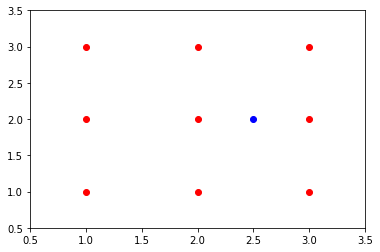

In [39]:
import matplotlib.pyplot as plt 

plt.plot(points[:,0], points[:,1], "ro")
plt.plot(p[0], p[1], "bo")
plt.axis([0.5, 3.5, 0.5, 3.5])

In [40]:
distances = np.zeros(points.shape[0])
for i in range(len(distances)):
  distances[i] = distance(p, points[i])

distances

array([1.80277564, 1.5       , 1.80277564, 1.11803399, 0.5       ,
       1.11803399, 1.11803399, 0.5       , 1.11803399])

In [41]:
ind = np.argsort(distances)
ind

array([4, 7, 3, 5, 6, 8, 1, 0, 2])

In [42]:
distances[ind]

array([0.5       , 0.5       , 1.11803399, 1.11803399, 1.11803399,
       1.11803399, 1.5       , 1.80277564, 1.80277564])

In [43]:
distances[ind][0:2]

array([0.5, 0.5])

In [46]:
def find_nearest_neighbors(p, points, k = 5):
  """
  Find the k nearest neighbors of point p and return their indices.
  """
  distances = np.zeros(points.shape[0])
  for i in range(len(distances)):
    distances[i] = distance(p, points[i])
  ind = np.argsort(distances)
  return ind[:k]

In [47]:
ind = find_nearest_neighbors(p, points, 2);
print(points[ind])

[[2 2]
 [3 2]]


In [51]:
def knn_predict(p, points, outcomes, k=5):
  """
  """
  # find k nearest neighbors
  ind = find_nearest_neighbors(p, points, k)
  # predict the class of p based on majority vote
  return majority_vote(outcomes[ind])

# Defining the classes
outcomes = np.array([0,0,0,0,1,1,1,1,1])

knn_predict(np.array([2.5, 2.7]), points, outcomes, k=2)

1

In [52]:
knn_predict(np.array([1.0, 2.7]), points, outcomes, k=2)

0

In [54]:
# 3.3.5 Generating Synthetic Data
ss.norm(0,1).rvs((5,2))
ss.norm(1,1).rvs((5,2))

array([[ 2.7877244 , -0.05170493],
       [ 1.5265511 ,  0.11790133],
       [ 0.09265642, -0.61980103],
       [ 1.98559305,  1.83568518],
       [ 1.4709593 , -0.63551403]])

In [56]:
np.concatenate((ss.norm(0,1).rvs((5,2)),
               ss.norm(1,1).rvs((5,2))),
               axis = 0)

array([[ 1.26614957,  0.90236789],
       [ 0.80063591,  0.75868597],
       [-0.24880002, -0.1799503 ],
       [-2.48290151,  0.74600183],
       [-0.01674125,  0.04689474],
       [ 2.14878698,  1.20603411],
       [ 0.40161799, -0.88562372],
       [ 1.08468879,  0.02951723],
       [-0.42449889,  0.57495059],
       [-0.21412299,  0.75241989]])

In [60]:
n = 5
np.concatenate((np.repeat(0,n), np.repeat(1,n)))

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [67]:
def generate_synth_data(n= 50):
  """
  Create two sets of points from bivariate normal distributions.
  """
  points = np.concatenate((ss.norm(0,1).rvs((n,2)), ss.norm(1,1).rvs((n,2))), axis =0)
  outcomes = np.concatenate((np.repeat(0,n), np.repeat(1,n)))
  return (points, outcomes)

In [63]:
generate_synth_data(5)

(array([[-0.53233489, -0.4399925 ],
        [-1.25227168,  0.79889107],
        [ 1.440591  , -1.40912123],
        [ 1.20920805,  0.36385531],
        [-0.27987695, -0.94838873],
        [ 1.35167248,  2.44978686],
        [ 0.98338901,  0.1768517 ],
        [-0.92448214,  0.07636212],
        [-0.20556273, -0.17969573],
        [ 1.57173467,  1.43039144]]), array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1]))

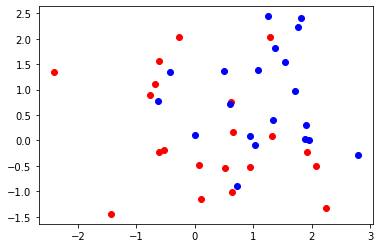

In [68]:
n = 20
points, outcomes = generate_synth_data(n)
plt.figure()
plt.plot(points[:n,0], points[:n, 1], "ro")
plt.plot(points[n:, 0], points[n:, 1], "bo")
plt.savefig("bivardata.pdf")

In [69]:
# 3.3.6: Making a prediction grid
def make_prediction_grid(predictors, outcomes, limits, h, k):
  """
  Classify each point on the prediction grid.
  """
  (x_min, x_max, y_min, y_max) = limits
  xs = np.arange(x_min, x_max, h)
  ys = np.arange(y_min, y_max, h)
  xx, yy = np.meshgrid(xs, ys)

  prediction_grid = np.zeros(xx.shape, dtype= int)
  for i,x in enumerate(xs):
    for j,y in enumerate(ys):
      p = np.array([x,y])
      prediction_grid[j,i] = knn_predict(p, predictors, outcomes, k)
  
  return (xx, yy, prediction_grid)

In [71]:
seasons= ["spring", "summer", "fall", "winter"]
for index, content in enumerate(seasons):
  print(index, content)

0 spring
1 summer
2 fall
3 winter


In [81]:
enumerate(seasons)

In [74]:
list(enumerate(seasons))

[(0, 'spring'), (1, 'summer'), (2, 'fall'), (3, 'winter')]

In [78]:
xs = np.arange(0, 10, 1)
ys = np.arange(0, 10, 1)
np.meshgrid(xs,ys)

[array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]),
 array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
        [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
        [6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
        [7, 7, 7, 7, 7, 7, 7, 7, 7, 7],
        [8, 8, 8, 8, 8, 8, 8, 8, 8, 8],
        [9, 9, 9, 9, 9, 9, 9, 9, 9, 9]])]

In [84]:
#3.3.7: Plotting the prediction grid
from matplotlib.colors import ListedColormap

def plot_prediction_grid(xx, yy, prediction_grid, filename):
  """
  Plot KNN predictions for every point on the grid
  """
  background_colormap = ListedColormap(["hotpink", "lightskyblue", "yellowgreen"])
  observation_colormap = ListedColormap(["red", "blue", "green"])
  
  plt.figure(figsize =(10,10))
  plt.pcolormesh(xx, 
                 yy, 
                 prediction_grid, 
                 cmap = background_colormap,
                 alpha = 0.5)
  plt.scatter(predictors[:,0], 
              predictors[:,1],
              c = outcomes, 
              cmap = observation_colormap,
              s = 50)
  plt.xlabel("Variable 1")
  plt.ylabel("Variable 2")
  plt.xticks(())
  plt.yticks(())
  plt.xlim(np.min(xx), np.max(xx))
  plt.ylim(np.min(yy), np.max(yy))
  plt.savefig(filename)

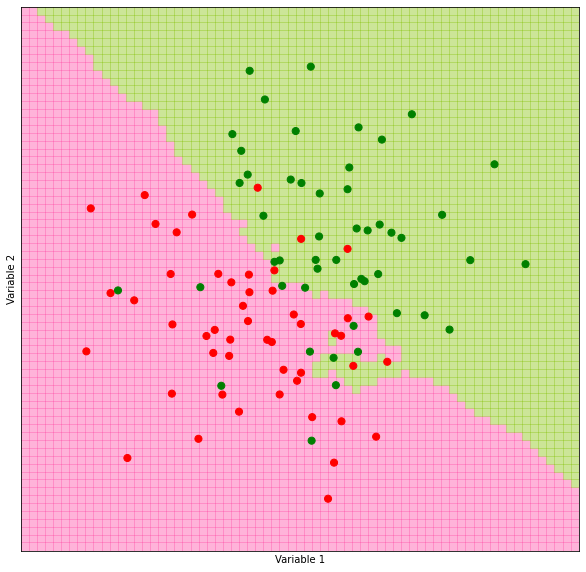

In [87]:
(predictors, outcomes) = generate_synth_data()

k = 5
filename = "knn_synth_5.pdf"
limits = (-3,4,-3,4)
h = 0.1

(xx,yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid(xx, yy, prediction_grid, filename)

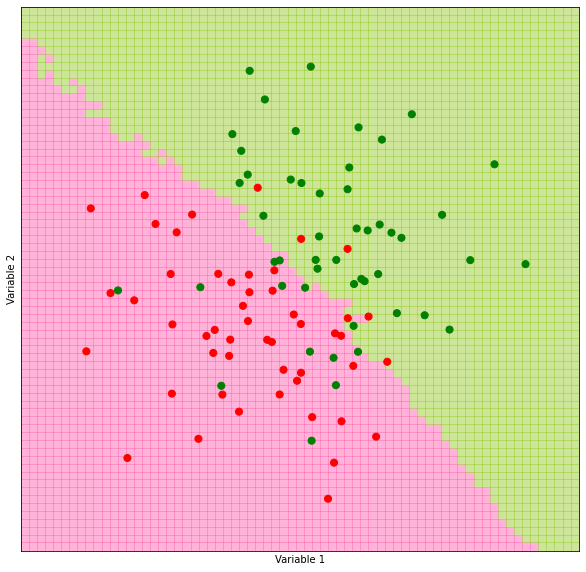

In [88]:
k = 50
filename = "knn_synth_50.pdf"
limits = (-3,4,-3,4)
h = 0.1

(xx,yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid(xx, yy, prediction_grid, filename)

# 3.3.8: Applying the kNN Method
- Learn how to apply the homemade kNN classifier to a real dataset

- Compare the performance of the homemade kNN classifier to the performance of the kNN classifier from the scikit-learn module

In [89]:
from sklearn import datasets 
iris = datasets.load_iris()

In [91]:
iris["data"].shape

(150, 4)

In [93]:
predictors = iris.data[:, 0:2]
outcomes = iris.target

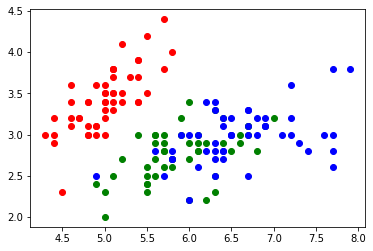

In [97]:
plt.plot(predictors[outcomes == 0][:,0], predictors[outcomes == 0][:,1], "ro")
plt.plot(predictors[outcomes == 1][:,0], predictors[outcomes == 1][:,1], "go")
plt.plot(predictors[outcomes == 2][:,0], predictors[outcomes == 2][:,1], "bo")
plt.savefig("iris.pdf")

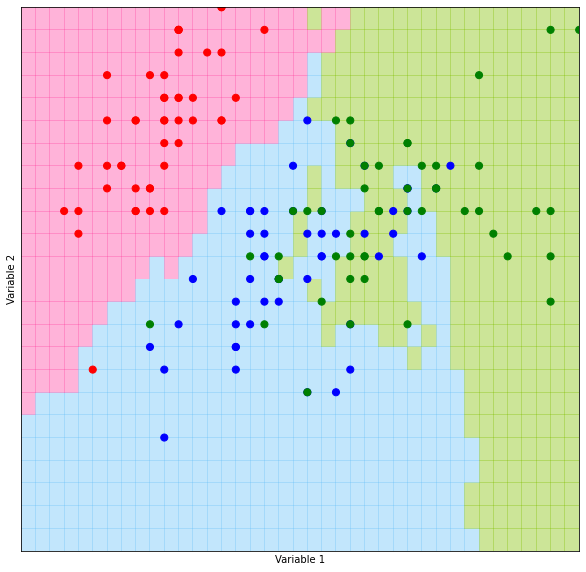

In [98]:
k = 5; filename= "iris_grid.pdf" ; limits = (4,8,1.5,4); h = 0.1
(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid(xx, yy, prediction_grid, filename)


In [99]:
 from sklearn.neighbors import KNeighborsClassifier
 knn = KNeighborsClassifier(n_neighbors = 5)

In [100]:
knn.fit(predictors, outcomes)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [101]:
sk_predictions = knn.predict(predictors)

In [102]:
sk_predictions.shape

(150,)

In [103]:
sk_predictions[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [104]:
my_predictions = np.array([knn_predict(p, predictors, outcomes, 5) for p in predictors])


In [106]:
my_predictions.shape

(150,)

In [114]:
print(f"My predictions and the sklearn predictions correspond {100 *np.mean(sk_predictions == my_predictions)} % of the time" )

My predictions and the sklearn predictions correspond 96.0 % of the time


In [115]:
print(f"My predictions and the real outcomes correspond {100 *np.mean(outcomes == my_predictions)} % of the time" )
print(f"Sklearn predictions and the real outcomes correspond {100 *np.mean(outcomes == sk_predictions)} % of the time" )

My predictions and the real outcomes correspond 84.66666666666667 % of the time
Sklearn predictions and the real outcomes correspond 83.33333333333334 % of the time
